<a href="https://colab.research.google.com/github/FGalvao77/Introducao-ao-AutoML-com-PyCaret/blob/main/Introdu%C3%A7%C3%A3o_ao_AutoML_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução ao AutoML com PyCaret**

---



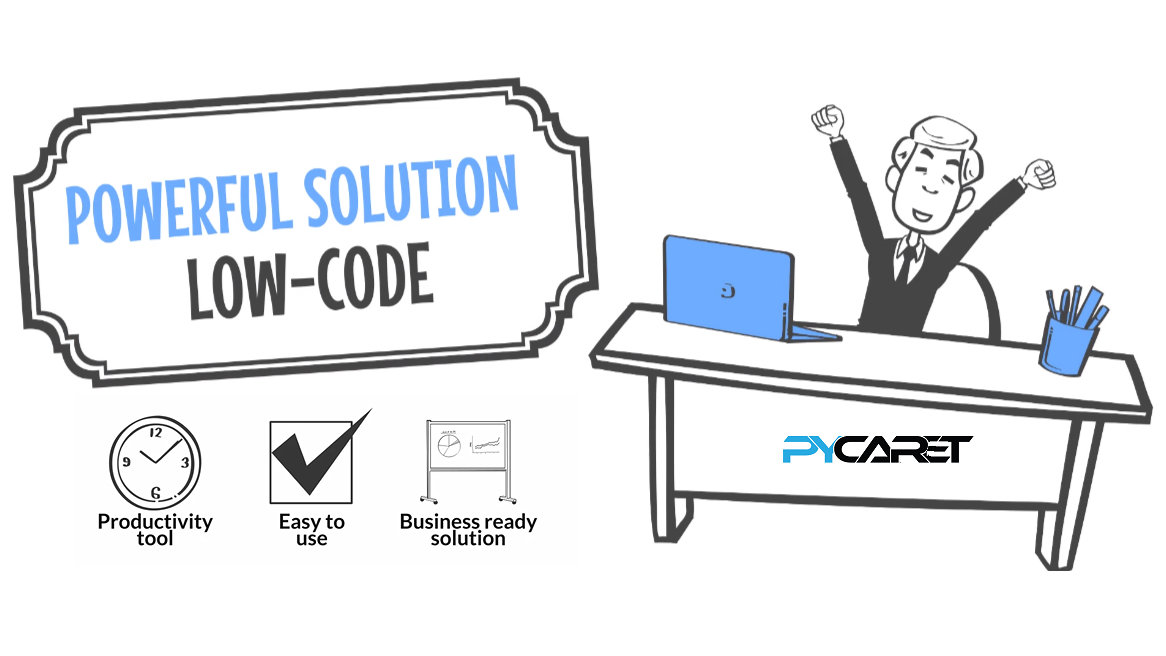

**Official Page:** https://pycaret.org/

## **1. Introdução**

**O que é o `PyCaret`?**

_`PyCaret` é uma biblioteca de aprendizado de máquina de código aberto e baixo código (**low-code**) em Python que permite ir desde a preparação de seus dados até a implantação de seu modelo em minutos, na escolha do ambiente de notebook._

Essa definição se encontra no próprio site da biblioteca - é uma tradução bem literal, vou tentar deixar mais claro a definição.

O principal propósito da biblioteca é otimizar as necessidades do profissional e trazer mais "produtividade" e entrega de análises/projetos de ciência de dados, aprendizado de máquinas e etc.

A biblioteca _"encapsula"_ ou melhor possui um `pipeline` de vários modelos e roda-os simultaneamente e por fim, **ranqueia** os modelos conforme um parâmetro definido de avaliação ou não pelo usuário.

Melhor forma para aprender é **"botar a mão na massa!"**

Então vamos lá!!!!



## **2. Instalando a biblioteca**

In [1]:
# primeiro vamos ver se os diretórios/dependências necessita de atualizações
!apt-get update

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [2]:
# comando para instalar a biblioteca "pycaret"
!pip install pycaret

In [3]:
# atualizando os diretórios/dependências
!apt upgrade

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Calculating upgrade... Done
The following packages have been kept back:
  libcudnn8 libcudnn8-dev libnccl-dev libnccl2
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [4]:
# removendo aplicações obsoletas
!apt autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


## **3. Carregando o conjunto de dados**

Para nossa atividade prática, usaremos uma função própria da biblioteca que nos fornece uma gama de `datasets`.

Segue o comando abaixo.

```python
# importando a função para carregamento de datasets
from pycaret.datasets import get_data
```

In [5]:
# importando a biblioteca para importação de datasets
from pycaret.datasets import get_data

Através do comando que segue.
```python 
get_data('index')
```
Podemos visualizar os conjuntos de dados fornecidos pelo `PyCaret`.

In [6]:
# visualizando os datasets embutidos no pycaret
get_data('index');

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


> Podemos ver que a biblioteca possui um número bem considerado de `datasets` e para as mais diversas aplicações/estudos.

> Iremos trabalhar com três cases:     
- um de _regressão_.
    - o dataset `"house"`.
- e outro de _classificação_.
    - o dataset chamado `"employee"`.
- e por fim um de _clusterização_.
    - o dataset `"seeds"`.



O dataset `house ` contém observações sobre casas e, o objetivo é prever o valor de venda da casa.

Já o dataset  `employee` contém observações de funcionários de uma empresa e, o objetivo é prever, dado algumas variáveis se o funcionário irá deixar ou não a empresa.

E por fim o dataset `seeds` contém observações sobre grão de trigo, onde iremos agrupar os mesmos por similaridade, utilizando técnica de aprendizado não-supervisionado.

## **4. Regressão - `house`**

#### **4.1. Importando e preparando os dados**

In [7]:
# importando a função "get_data" do módulo ".datasets" da biblioteca "pycaret"
from pycaret.datasets import get_data

In [8]:
# instanciando o dataset "house" no objeto de mesmo nome
house = get_data('house')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# dimensão do dataset
house.shape    # linhas e colunas

(1460, 81)

> Veja que esse conjunto de dados possui um número alto de recursos (colunas).

In [10]:
# data = house.sample(frac=0.7, random_state=786)
# data_unseen = house.drop(data.index)

# data.reset_index(drop=True, inplace=True)
# data_unseen.reset_index(drop=True, inplace=True)

# print('Data for Modeling: ' + str(data.shape))
# print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Diferentemente do tutorial do próprio `PyCaret`, aqui estarei adotando outra estratégia na divisão dos dados.

Importarei a função `train_test_split` do módulo `model_selection` do **sklearn** para realizar o particionamento do dataset.


In [11]:
# importando a função 
from sklearn.model_selection import train_test_split

In [12]:
# instanciando o conjunto de dados nas variáveis X e y
X = house
y = house

In [13]:
# realizando o reset dos índices
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [14]:
# visualizando a dimensão das variáveis
X.shape, y.shape

((1460, 81), (1460, 81))

In [15]:
# aplicando a divisão dos dados em treino e teste - reservarei 30% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

> Dividi as váriavies `X` e `y` em partes para treino e outra parte para teste.

In [16]:
# visualizando o tamanho das partições 
len(X_train), len(X_test), len(y_train), len(y_test)

(1022, 438, 1022, 438)

#### **4.2. Aplicando a regressão**

In [17]:
# importando o módulo de regressão
from pycaret.regression import*

In [18]:
# visualizando a variável "X_train"
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
376,377,85,RL,57.0,8846,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,SFoyer,5,5,1996,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,298,Unf,0,572,870,GasA,Ex,Y,SBrkr,914,0,0,914,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1998.0,Unf,2,576,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,148000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,Po,CBlock,TA,TA,No,Unf,0,Unf,0,728,728,GasA,Ex,Y,SBrkr,1306,0,0,1306,0,0,1,0,3,1,Fa,6,Mod,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,263,0,0,0,0,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
228,229,20,RL,70.0,8521,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,842,Unf,0,70,912,GasA,TA,Y,SBrkr,912,0,0,912,0,0,1,0,3,1,TA,5,Typ,1,Fa,Detchd,1974.0,Unf,1,336,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,125000
40,41,20,RL,84.0,8658,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1965,1965,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,101.0,TA,TA,CBlock,TA,TA,No,Rec,643,Unf,0,445,1088,GasA,Ex,Y,SBrkr,1324,0,0,1324,0,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1965.0,RFn,2,440,TA,TA,Y,0,138,0,0,0,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,160000
428,429,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,108.0,Gd,TA,PConc,Gd,TA,No,GLQ,664,Unf,0,544,1208,GasA,Ex,Y,SBrkr,1208,0,0,1208,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2007.0,RFn,2,628,TA,TA,Y,105,54,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial,195400


In [19]:
# visualizando a variável "X_test"
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
147,148,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,180.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,884,884,GasA,Ex,Y,SBrkr,884,1151,0,2035,0,0,2,1,3,1,Gd,8,Typ,1,Gd,BuiltIn,2001.0,Fin,2,434,TA,TA,Y,144,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,2,1900,1950,Gable,CompShg,AsbShng,Stucco,None,0.0,TA,TA,BrkTil,TA,Fa,No,Unf,0,Unf,0,1095,1095,GasW,Fa,N,SBrkr,1095,679,0,1774,1,0,2,0,4,2,TA,8,Min2,0,NaN,2Types,1920.0,Unf,3,779,Fa,Fa,N,0,0,90,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000
1304,1305,160,RM,32.0,3363,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,117.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,976,976,GasA,Ex,Y,SBrkr,976,732,0,1708,0,0,2,0,3,1,Gd,7,Maj1,0,NaN,Detchd,2004.0,Unf,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,130000
1372,1373,60,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,975,Unf,0,133,1108,GasA,Ex,Y,SBrkr,1108,989,0,2097,1,0,2,1,3,1,Gd,8,Typ,1,TA,Detchd,1998.0,RFn,2,583,TA,TA,Y,253,170,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,274300
1427,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,5,6,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,580,Unf,0,333,913,GasA,TA,Y,FuseA,1048,510,0,1558,1,0,1,1,3,1,TA,6,Typ,1,TA,Attchd,1962.0,Unf,1,288,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,140000


In [20]:
# quantidade de colunas e o seu nome da variável "X_train"
len(X_train.columns), X_train.columns

(81, Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'Garage

In [21]:
# quantidade de colunas e o seu nome da variável "X_test"
len(X_test.columns), X_test.columns

(81, Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'Garage

In [22]:
# inicializando o pipeline de regressão
regressor = setup(X_train,                              # dados de entrada, nesse caso o X_train
                  remove_outliers=True,                 # removendo a presença de outliers
                  normalize=True,                       # normalizando os dados
                  fold=5,                               # validação cruzada em 5 partes
                  target='SalePrice',                   # instanciando a variável alvo
                #   pca=True,                           # redução da dimensionalidade dos dados
                  feature_selection=True,               # aplicando selecão dos recursos
                  feature_selection_threshold=0.7,      # limite usado para seleção de recursos
                  ignore_low_variance=True,             # ignorando baixa variância
                  remove_multicollinearity=True,        # removendo multicolinearidade
                  multicollinearity_threshold=0.7,      # definindo um limite para descarte da multicolinearidade      
                  remove_perfect_collinearity=True,     # removendo colinearidade perfeita
                  silent=True)                          # controla a entrada de confirmação de tipos de dados 

,Description,Value
0,session_id,7955
1,Target,SalePrice
2,Original Data,"(1022, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(679, 229)"


> O código acima retorna a lista de parâmetros utilizados e definidos pelo usuário e os que foram instanciados por padrão.

Segue o link da documentação mais detalhada dos parâmetros utilizados e de outros.

- https://pycaret.readthedocs.io/en/latest/api/regression.html

In [23]:
# visualizando o melhor modelo e classificando pela raiz do erro médio quadrático -  RMSE (root mean squared error)
best_model = compare_models(sort='RMSE', )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,1.794866e+04,9.485089e+08,2.852462e+04,8.706000e-01,0.1457,1.069000e-01,0.168
gbr,Gradient Boosting Regressor,1.785567e+04,9.098690e+08,2.901694e+04,8.682000e-01,0.1466,1.046000e-01,0.384
par,Passive Aggressive Regressor,1.875376e+04,1.028629e+09,2.992353e+04,8.592000e-01,0.1528,1.100000e-01,0.480
br,Bayesian Ridge,1.893009e+04,1.042569e+09,3.044671e+04,8.547000e-01,0.1546,1.122000e-01,0.078
lightgbm,Light Gradient Boosting Machine,1.881718e+04,9.940420e+08,3.062571e+04,8.527000e-01,0.1537,1.100000e-01,0.186
rf,Random Forest Regressor,1.957884e+04,1.092379e+09,3.161764e+04,8.449000e-01,0.1605,1.154000e-01,1.294
omp,Orthogonal Matching Pursuit,2.117030e+04,1.224791e+09,3.339985e+04,8.226000e-01,0.1735,1.251000e-01,0.028
en,Elastic Net,2.033045e+04,1.231222e+09,3.352880e+04,8.257000e-01,0.1584,1.161000e-01,0.028
ridge,Ridge Regression,2.227929e+04,1.257394e+09,3.413979e+04,8.178000e-01,0.1810,1.320000e-01,0.024
knn,K Neighbors Regressor,2.140589e+04,1.293381e+09,3.471975e+04,8.130000e-01,0.1710,1.214000e-01,0.080


> Veja que o modelo `Huber Regressor` foi o que obteve o primeiro lugar.

Portanto utilizaremos esse modelo como nosso classificador.

In [24]:
# instanciando o classificador que obteve melhor desempenho
huber_regr = create_model('huber', fold=5)  # validação cruzada em 5 partes

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16872.1710,4.850999e+08,22024.9840,0.9257,0.1246,0.0972
1,14411.5953,4.021802e+08,20054.4307,0.9050,0.1497,0.1025
2,16260.2936,4.670077e+08,21610.3613,0.8956,0.1277,0.0977
3,23674.5107,2.616368e+09,51150.4438,0.7282,0.1883,0.1323
4,18524.7320,7.718889e+08,27782.8886,0.8986,0.1385,0.1047
Mean,17948.6605,9.485089e+08,28524.6217,0.8706,0.1457,0.1069
SD,3150.7923,8.435656e+08,11612.7035,0.0720,0.0230,0.0130


In [25]:
# "tunando" o modelo com o classificador instanciado acima 
tuned_regr = tune_model(huber_regr, fold=5)     # validação cruzada em 5 partes

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,16940.0934,4.736550e+08,21763.6163,0.9275,0.1233,0.0969
1,14247.9211,3.929379e+08,19822.6606,0.9072,0.1498,0.1019
2,16910.0480,4.917258e+08,22174.8917,0.8901,0.1364,0.1025
3,24480.2133,2.693638e+09,51900.2724,0.7202,0.2021,0.1372
4,18857.3202,7.902221e+08,28110.8901,0.8962,0.1419,0.1073
Mean,18287.1192,9.684358e+08,28754.4662,0.8682,0.1507,0.1092
SD,3426.5280,8.730798e+08,11900.2728,0.0751,0.0271,0.0144


In [26]:
# realizando as predições com os dados de "X_test"
predictions = predict_model(tuned_regr, data=X_test)

In [27]:
# visualizando os valores reais VS os preditos
predictions[['SalePrice', 'Label']]

,SalePrice,Label
147,222500,219312.388570
676,87000,142078.497717
1304,130000,147317.889576
1372,274300,254541.176682
1427,140000,139025.450090
...,...,...
908,131000,114689.723316
1096,127000,126555.822958
637,93000,101553.408418
753,275500,289453.097895


In [28]:
# salvando o modelo para submissão no "Kaggle"
output = pd.DataFrame({
    'Id': X_test.index,
    'SalePrice': predictions['Label']
})

output.set_index('Id', inplace=True)
output.to_csv('submission.csv')

In [29]:
# visualizando o dataframe criado
output

,SalePrice
Id,
147,219312.388570
676,142078.497717
1304,147317.889576
1372,254541.176682
1427,139025.450090
...,...
908,114689.723316
1096,126555.822958
637,101553.408418


In [30]:
# com a função "evaluate_model" podemos visualizar graficamente o desempenho do modelo
evaluate_model(huber_regr);

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Podemos visualizar também individualmente cada gráfico.

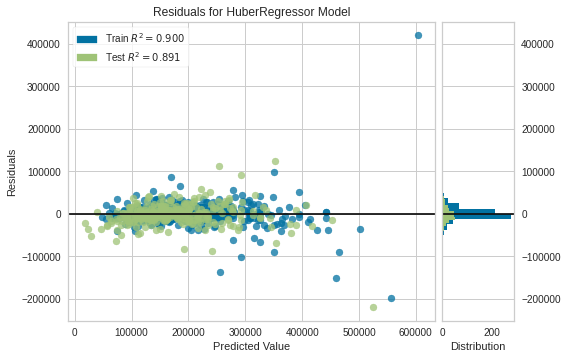

In [31]:
# visualizando o resídual
plot_model(tuned_regr)

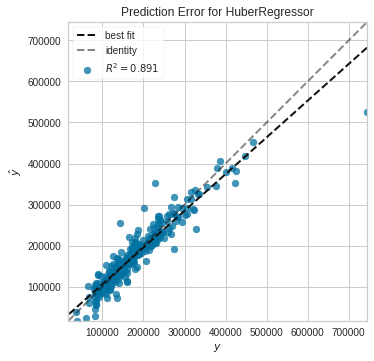

In [32]:
# visualizando a prredição do erro da reta de regressão
plot_model(tuned_regr, plot='error')

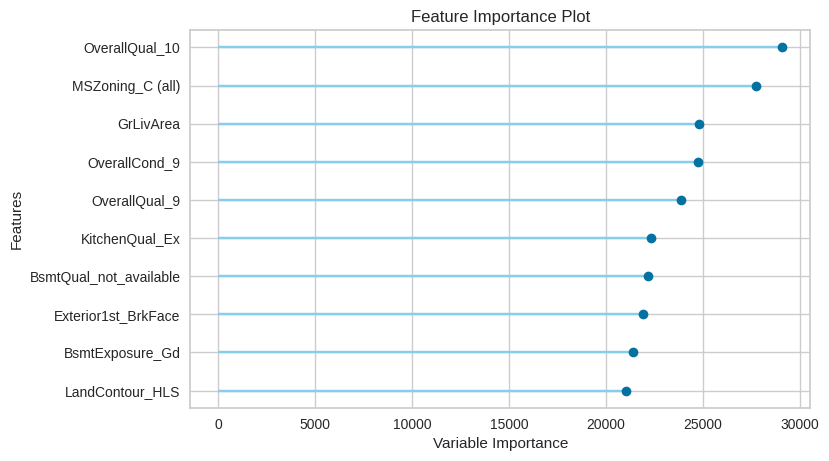

In [33]:
# visualizando os recursos mais importante
plot_model(tuned_regr, plot='feature')

In [34]:
# com a função "predict_model" visualizando os parâmetros de avaliação do modelo "tunado"
predict_model(tuned_regr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,16945.5016,7.003417e+08,26463.9696,0.8913,0.1726,0.1062


,MoSold_5,Neighborhood_Mitchel,BsmtFinSF1,ExterQual_TA,Neighborhood_BrDale,MasVnrType_BrkCmn,MasVnrArea,BsmtExposure_Gd,BsmtFinType1_ALQ,BsmtFinType1_Unf,OverallCond_8,BedroomAbvGr_1,Condition1_Feedr,OverallCond_6,HalfBath_2,LotShape_IR2,Fence_MnPrv,Exterior2nd_Plywood,Neighborhood_Edwards,BedroomAbvGr_4,MSSubClass_40,Exterior2nd_Stucco,ExterCond_TA,MoSold_9,Neighborhood_Gilbert,FireplaceQu_Po,Neighborhood_OldTown,GarageCond_TA,MoSold_2,MSSubClass_160,Fence_GdWo,BedroomAbvGr_5,OverallQual_6,BsmtHalfBath_0,TotRmsAbvGrd_11,MSSubClass_60,FireplaceQu_Fa,2ndFlrSF,OpenPorchSF,BsmtFinType1_GLQ,...,Neighborhood_NWAmes,TotalBsmtSF,EnclosedPorch,FireplaceQu_TA,FireplaceQu_Ex,Neighborhood_BrkSide,HouseStyle_SFoyer,Electrical_FuseF,RoofStyle_Gambrel,MoSold_8,BsmtUnfSF,LandContour_HLS,GarageCars_1,Condition1_PosA,GrLivArea,TotRmsAbvGrd_5,TotRmsAbvGrd_8,MoSold_11,Neighborhood_NPkVill,Neighborhood_IDOTRR,SaleCondition_Normal,HeatingQC_Gd,GarageCond_Po,SaleCondition_Family,OverallQual_7,YrSold_2009,ExterCond_Fa,LotShape_Reg,OverallQual_10,LandContour_Bnk,SaleCondition_Alloca,GarageCars_4,GarageType_Detchd,BedroomAbvGr_3,OverallQual_5,OverallQual_4,MSSubClass_120,BedroomAbvGr_6,SalePrice,Label
0,0.0,0.0,0.363314,1.0,0.0,0.0,-0.567055,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.774257,-0.673205,0.0,...,0.0,-0.645050,-0.359244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.976857,0.0,1.0,0.0,-1.348712,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,124900,116132.000795
1,0.0,0.0,0.410598,0.0,0.0,0.0,0.425721,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.774257,-0.673205,1.0,...,0.0,-0.480085,-0.359244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.857482,0.0,0.0,0.0,-0.645477,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000,199620.854256
2,0.0,0.0,-0.350062,1.0,0.0,0.0,-0.567055,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.774257,-0.256626,0.0,...,0.0,-0.273879,-0.359244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189870,0.0,1.0,0.0,-1.037175,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,106500,95103.885038
3,1.0,0.0,-0.935975,1.0,0.0,0.0,-0.567055,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.774257,-0.673205,0.0,...,0.0,-1.209402,1.078772,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.138976,0.0,1.0,0.0,-1.822394,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,68500,60199.832254
4,0.0,0.0,-0.818792,0.0,0.0,0.0,1.920338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.670248,1.290664,1.0,...,0.0,0.683349,-0.359244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.696705,1.0,0.0,0.0,1.715646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320000,288463.776670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,1.0,0.0,-0.195874,1.0,0.0,0.0,-0.217947,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.774257,-0.673205,0.0,...,0.0,-0.015580,-0.359244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288974,0.0,1.0,0.0,-0.517947,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,134450,123761.472245
303,0.0,0.0,-0.835239,1.0,0.0,0.0,-0.567055,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.

In [35]:
# finalizando o modelo
model_HuberRegr = finalize_model(tuned_regr)

In [36]:
# visualizando os parâmetros final do modelo
model_HuberRegr

HuberRegressor(alpha=0.0001, epsilon=1.5, fit_intercept=False, max_iter=100,
               tol=1e-05, warm_start=False)

In [37]:
# com a função "predict_model" visualizando os parâmetros de avaliação do modelo final
predict_model(model_HuberRegr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,11990.5584,4.247452e+08,20609.347,0.9341,0.1023,0.0706


,MoSold_5,Neighborhood_Mitchel,BsmtFinSF1,ExterQual_TA,Neighborhood_BrDale,MasVnrType_BrkCmn,MasVnrArea,BsmtExposure_Gd,BsmtFinType1_ALQ,BsmtFinType1_Unf,OverallCond_8,BedroomAbvGr_1,Condition1_Feedr,OverallCond_6,HalfBath_2,LotShape_IR2,Fence_MnPrv,Exterior2nd_Plywood,Neighborhood_Edwards,BedroomAbvGr_4,MSSubClass_40,Exterior2nd_Stucco,ExterCond_TA,MoSold_9,Neighborhood_Gilbert,FireplaceQu_Po,Neighborhood_OldTown,GarageCond_TA,MoSold_2,MSSubClass_160,Fence_GdWo,BedroomAbvGr_5,OverallQual_6,BsmtHalfBath_0,TotRmsAbvGrd_11,MSSubClass_60,FireplaceQu_Fa,2ndFlrSF,OpenPorchSF,BsmtFinType1_GLQ,...,Neighborhood_NWAmes,TotalBsmtSF,EnclosedPorch,FireplaceQu_TA,FireplaceQu_Ex,Neighborhood_BrkSide,HouseStyle_SFoyer,Electrical_FuseF,RoofStyle_Gambrel,MoSold_8,BsmtUnfSF,LandContour_HLS,GarageCars_1,Condition1_PosA,GrLivArea,TotRmsAbvGrd_5,TotRmsAbvGrd_8,MoSold_11,Neighborhood_NPkVill,Neighborhood_IDOTRR,SaleCondition_Normal,HeatingQC_Gd,GarageCond_Po,SaleCondition_Family,OverallQual_7,YrSold_2009,ExterCond_Fa,LotShape_Reg,OverallQual_10,LandContour_Bnk,SaleCondition_Alloca,GarageCars_4,GarageType_Detchd,BedroomAbvGr_3,OverallQual_5,OverallQual_4,MSSubClass_120,BedroomAbvGr_6,SalePrice,Label
0,0.0,0.0,0.363314,1.0,0.0,0.0,-0.567055,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.774257,-0.673205,0.0,...,0.0,-0.645050,-0.359244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.976857,0.0,1.0,0.0,-1.348712,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,124900,127478.895234
1,0.0,0.0,0.410598,0.0,0.0,0.0,0.425721,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.774257,-0.673205,1.0,...,0.0,-0.480085,-0.359244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.857482,0.0,0.0,0.0,-0.645477,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000,199411.412012
2,0.0,0.0,-0.350062,1.0,0.0,0.0,-0.567055,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.774257,-0.256626,0.0,...,0.0,-0.273879,-0.359244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189870,0.0,1.0,0.0,-1.037175,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,106500,96195.302309
3,1.0,0.0,-0.935975,1.0,0.0,0.0,-0.567055,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.774257,-0.673205,0.0,...,0.0,-1.209402,1.078772,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.138976,0.0,1.0,0.0,-1.822394,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,68500,66041.811338
4,0.0,0.0,-0.818792,0.0,0.0,0.0,1.920338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.670248,1.290664,1.0,...,0.0,0.683349,-0.359244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.696705,1.0,0.0,0.0,1.715646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320000,274665.339893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,1.0,0.0,-0.195874,1.0,0.0,0.0,-0.217947,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.774257,-0.673205,0.0,...,0.0,-0.015580,-0.359244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288974,0.0,1.0,0.0,-0.517947,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,134450,131828.291930
303,0.0,0.0,-0.835239,1.0,0.0,0.0,-0.567055,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.

In [38]:
# aplicando o modelo final nos dados "y_train"
unseen_predictions = predict_model(model_HuberRegr, data=y_train)

# visualizando o valor rel VS predito
unseen_predictions[['SalePrice', 'Label']].head()

,SalePrice,Label
376,148000,142724.214084
250,76500,109653.365185
228,125000,113127.940581
40,160000,145805.940785
428,195400,198172.891392


In [39]:
# importando a função para avaliação do modelo final
from pycaret.utils import check_metric

# checando performance do modelo, usando como métrica o "R2"
check_metric(unseen_predictions.SalePrice, unseen_predictions.Label, 'R2')

0.8621

In [40]:
# salvando o modelo
save_model(model_HuberRegr,'Final Huber Regressor Model 05Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='SalePrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                                     top_features_to_pick=0.30000000000000004)),
                 ('fix_multi',
                  Fix_multicollinearity(correlation_with_target_preference=None,
                                        correlation_with_target_threshold=0.0,
                         

In [41]:
# instanciando o modelo salvo
saved_final_HuberRegr = load_model('Final Huber Regressor Model 05Nov2021')

Transformation Pipeline and Model Successfully Loaded


In [42]:
# aplicando o modelo salvo nos dados "y_test"
new_prediction = predict_model(saved_final_HuberRegr, data=y_test)

In [43]:
# visualizando o valor real VS predito
round(pd.DataFrame(new_prediction[['SalePrice', 'Label']].head()))

,SalePrice,Label
147,222500,220467.0
676,87000,121245.0
1304,130000,152814.0
1372,274300,251715.0
1427,140000,137173.0


In [44]:
# importando a função para avaliação
from pycaret.utils import check_metric

# checando performance do modelo, usando como métrica o "R2"
check_metric(new_prediction.SalePrice, new_prediction.Label, 'R2')

0.8986

## **5. Classificação - `employee`**

#### **5.1. Importando e preparando os dados**

In [45]:
# importando a função "get_data" do módulo ".datasets" da biblioteca "pycaret"
from pycaret.datasets import get_data

In [46]:
# instanciando o dataset "employee" na variável de mesmo nome
employee = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [47]:
# dimensão do dataset
employee.shape    # linhas e colunas

(14999, 10)

In [48]:
# importando da biblioteca do sklearn do módulo "model_selection" a função "train_test_split"
# essa função tem a finalidade de dividir a base de dados em treino e teste
from sklearn.model_selection import train_test_split

In [49]:
# instanciando o conjunto de dados nas variáveis "X" e "y"
X = employee
y = employee

In [50]:
# resetando os índices
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [51]:
# aplicando a divisão dos dados em treino e teste - reservando 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=.3)

In [52]:
# visualizando o tamanho do particionamento dos dados
len(X_train), len(X_test), len(y_train), len(y_test)

(10499, 4500, 10499, 4500)

#### **5.2. Aplicando a classificação**

In [53]:
# importando a função para classificação
from pycaret.classification import*

In [54]:
# inicializando o pipeline de classificação
classificador = setup(X_train, 
                      remove_outliers=True, 
                      normalize=True, 
                      fold=5, 
                      target='left', 
                    #   pca=True,
                      feature_selection=True,
                      feature_selection_threshold=0.7,
                      ignore_low_variance=True,
                      remove_multicollinearity=True, 
                      multicollinearity_threshold=0.7,
                      remove_perfect_collinearity=True,
                      silent=True)

,Description,Value
0,session_id,8907
1,Target,left
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10499, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [55]:
# visualizando o melhor classificador pela métrica da acurácia
best_model = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9832,0.9857,0.9396,0.9907,0.9644,0.9535,0.9541,0.812
lightgbm,Light Gradient Boosting Machine,0.9817,0.9878,0.9438,0.9800,0.9614,0.9494,0.9498,0.144
et,Extra Trees Classifier,0.9787,0.9842,0.9372,0.9737,0.9550,0.9411,0.9414,0.754
gbc,Gradient Boosting Classifier,0.9734,0.9862,0.9207,0.9679,0.9436,0.9261,0.9267,0.598
dt,Decision Tree Classifier,0.9696,0.9622,0.9479,0.9287,0.9379,0.9178,0.9181,0.046
knn,K Neighbors Classifier,0.9553,0.9672,0.9041,0.9106,0.9073,0.8779,0.8779,0.298
ada,Ada Boost Classifier,0.9542,0.9766,0.8964,0.9128,0.9044,0.8742,0.8744,0.290
svm,SVM - Linear Kernel,0.8934,0.0000,0.8047,0.7664,0.7845,0.7138,0.7147,0.046
lr,Logistic Regression,0.8933,0.9317,0.8028,0.7674,0.7844,0.7135,0.7142,0.094
ridge,Ridge Classifier,0.8801,0.0000,0.8188,0.7233,0.7678,0.6874,0.6901,0.026


In [56]:
# instanciando o classificador com melhor performance
randFor_class = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9814,0.9804,0.9320,0.9906,0.9604,0.9482,0.9490
1,0.9878,0.9880,0.9496,1.0000,0.9741,0.9662,0.9667
2,0.9814,0.9830,0.9379,0.9845,0.9606,0.9484,0.9489
3,0.9792,0.9850,0.9201,0.9936,0.9555,0.9419,0.9431
4,0.9864,0.9923,0.9586,0.9848,0.9715,0.9626,0.9627
Mean,0.9832,0.9857,0.9396,0.9907,0.9644,0.9535,0.9541
SD,0.0033,0.0041,0.0134,0.0058,0.0072,0.0093,0.0090


In [57]:
# "tunando" o classificador
tuned_class = tune_model(randFor_class, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9685,0.9794,0.9024,0.9652,0.9327,0.9122,0.9131
1,0.9749,0.9869,0.9169,0.9778,0.9464,0.9301,0.9309
2,0.9706,0.9862,0.9142,0.9626,0.9378,0.9186,0.9191
3,0.9749,0.9852,0.9083,0.9871,0.9461,0.9298,0.9311
4,0.9785,0.9889,0.9349,0.9753,0.9547,0.9406,0.9410
Mean,0.9735,0.9853,0.9153,0.9736,0.9435,0.9262,0.9270
SD,0.0035,0.0032,0.0110,0.0089,0.0076,0.0099,0.0098


In [58]:
# realizando as predições com o classificador "tunado"
predictions = predict_model(tuned_class, data=X_test)

In [59]:
# visualizando os valores reais VS as predições realizadas pelo modelo "tunado"
predictions[['left', 'Label']]

,left,Label
6958,0,0
7534,0,0
2975,0,0
3903,0,0
8437,0,0
...,...,...
8001,0,0
11630,0,0
8163,0,0
4063,0,0


In [60]:
# salvando o modelo para ser submetido ao "Kaggle"
output = pd.DataFrame({
    'Id': X_test.index,
    'left': predictions['Label']
})

output.set_index('Id', inplace=True)
output.to_csv('submission.csv')

In [61]:
# visualizando o dataframe
output

,left
Id,
6958,0
7534,0
2975,0
3903,0
8437,0
...,...
8001,0
11630,0
8163,0


In [62]:
# visualizando graficamente a performance do modelo
evaluate_model(randFor_class);

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

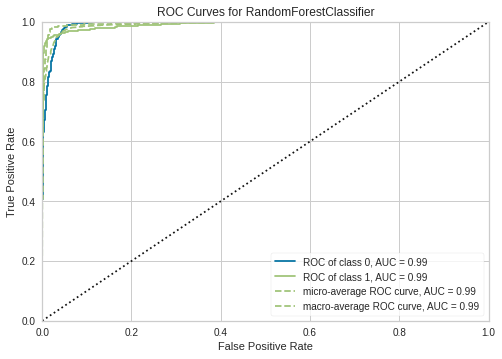

In [63]:
# visualizando o gráfico da curva ROC
plot_model(tuned_class)

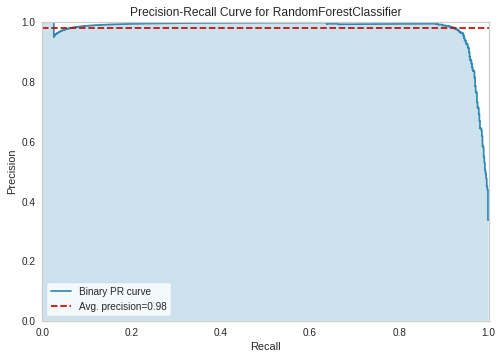

In [64]:
# visualizando o gráfico da curva de  precisão-recall
plot_model(tuned_class, plot='pr')

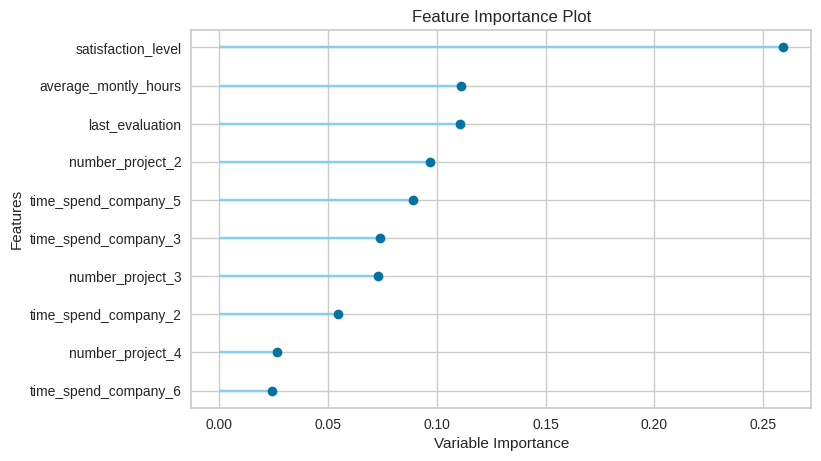

In [65]:
# visualizando os recursos de maior importância para o modelo
plot_model(tuned_class, plot='feature')

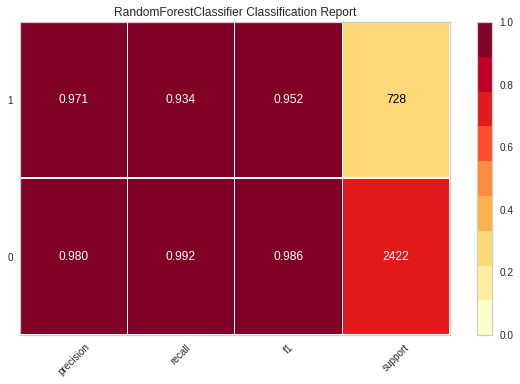

In [66]:
# visualizando o relatório de classificação
plot_model(tuned_class, plot='class_report')

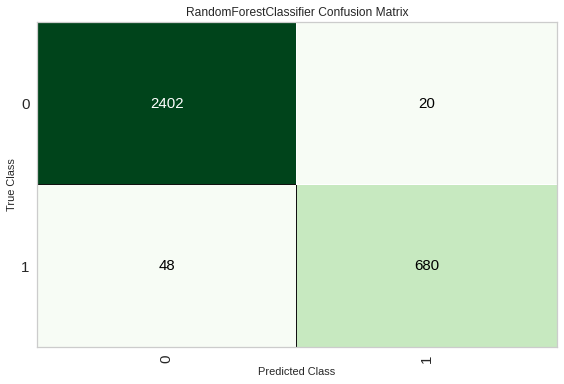

In [67]:
# visualizando a matriz de confusão
plot_model(tuned_class, plot='confusion_matrix')

In [68]:
# visualizando as métricas do modelo "tunado"
predict_model(tuned_class);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9784,0.9915,0.9341,0.9714,0.9524,0.9384,0.9387


In [69]:
# finalizando e instanciando o modelo "tunado"
model_RandFor = finalize_model(tuned_class)

In [70]:
# visualizando os parâmetros do modelo "tunado"
model_RandFor

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=-1, oob_score=False, random_state=8907, verbose=0,
                       warm_start=False)

In [71]:
# visualizando as métricas de desempenho do modelo
predict_model(model_RandFor);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9816,0.9959,0.9451,0.9745,0.9596,0.9476,0.9478


In [72]:
# aplicando o modelo nos dados de "y_ytrain"
unseen_predictions = predict_model(model_RandFor, data=y_train)

# visualizando os valores reais VS valores preditos
unseen_predictions[['left', 'Label']].head()

,left,Label
5242,0,0
12674,1,1
6924,0,0
12595,1,1
13482,0,0


In [73]:
# importando a função para avaliação
from pycaret.utils import check_metric

# checando a performance do modelo, usando como métrica de referência acurácia
check_metric(unseen_predictions.left, unseen_predictions.Label, 'Accuracy')

0.9794

In [74]:
# salvando o modelo
save_model(model_RandFor,'Final Random Forest Model 05Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='left',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced',
                                         criterion='entropy', max_depth=9,
                                         max_features='sqrt'

In [75]:
# instanciando o modelo salvo na variável "saved_final_RandFor"
saved_final_RandFor = load_model('Final Random Forest Model 05Nov2021')

Transformation Pipeline and Model Successfully Loaded


In [76]:
# realizando novas predições com modelo final salvo 
new_prediction = predict_model(saved_final_RandFor, data=y_test)

In [77]:
# visualizando os valores reais VS valores preditos
pd.DataFrame(new_prediction[['left', 'Label']].head())

,left,Label
6958,0,0
7534,0,0
2975,0,0
3903,0,0
8437,0,0


In [78]:
# importando a função para avaliação
from pycaret.utils import check_metric

# visualizando a performance do modelo, usando como métrica acurácia
check_metric(new_prediction.left, new_prediction.Label, 'Accuracy')

0.9716

## **6. Clusterização - `seeds`**

#### **6.1. Importando e preparando os dados**

In [79]:
# importando a função "get_data" do módulo ".datasets" da biblioteca "pycaret"
from pycaret.datasets import get_data

Diferentemente do tutorial do `PyCaret`, utilizarei um outro conjunto de dados.

In [80]:
# instanciando o dataset "seeds" na variável de mesmo nome
seeds = get_data('seeds')

,area,perimeter,compactness,length,width,asymmetry,length.1
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [81]:
# particionando os dados em treino e validação
train_data = seeds.sample(frac=0.7, random_state=786)
val_data = seeds.drop(train_data.index)

train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)

print('Dados de treino: ' + str(train_data.shape))
print('Dados de validação: ' + str(val_data.shape))

Dados de treino: (147, 7)
Dados de validação: (63, 7)


#### **6.2. Aplicando a clusterização**

In [82]:
# importando a função para clusterização
from pycaret.clustering import*

In [83]:
# inicializando o pipeline de clusterização
cluster = setup(train_data, 
                normalize=True, 
                # pca=True,
                ignore_low_variance=True,
                remove_multicollinearity=True, 
                multicollinearity_threshold=0.7,
                remove_perfect_collinearity=True,
                silent=True)

,Description,Value
0,session_id,5424
1,Original Data,"(147, 7)"
2,Missing Values,True
3,Numeric Features,7
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(147, 4)"
9,CPU Jobs,-1


In [84]:
# visualizando os modelos de clusterização presentes no "PyCaret"
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [85]:
# instanciando o modelo "kmeans"
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.318,90.877,0.974,0,0,0


In [86]:
# visualizando os parâmetros do modelo instanciado
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=5424, tol=0.0001, verbose=0)

In [87]:
# instanciando o modelo e passando o número de clusters
kmodes = create_model('kmodes', 
                      num_clusters=3) # 3 clusters

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1456,0.9466,9.8132,0,0,0


In [88]:
# visualizando os parâmetros do modelo definido o número de cluster manualmente
kmodes

KModes(cat_dissim=<function matching_dissim at 0x7f52d8314cb0>, init='Cao',
       max_iter=100, n_clusters=3, n_init=1, n_jobs=-1, random_state=5424,
       verbose=0)

In [89]:
# instanciando o modelo "kmeans"
kmean_results = assign_model(kmeans)
kmean_results.head(10)

,area,perimeter,compactness,length,width,asymmetry,length.1,Cluster
0,14.11,14.18,0.8820,5.541,3.221,2.754,5.038,Cluster 0
1,11.48,13.05,0.8473,5.180,2.758,5.876,5.002,Cluster 2
2,11.82,13.40,0.8274,5.314,2.777,4.471,5.178,Cluster 2
3,12.89,13.77,0.8541,5.495,3.026,6.185,5.316,Cluster 2
4,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,Cluster 0
5,16.23,15.18,0.8850,5.872,3.472,3.769,5.922,Cluster 1
6,18.36,16.52,0.8452,6.666,3.485,4.933,6.448,Cluster 2
7,14.37,14.39,0.8726,5.569,3.153,1.464,5.300,Cluster 0
8,18.75,16.18,0.8999,6.111,3.869,4.188,5.992,Cluster 1
9,15.38,14.77,0.8857,5.662,3.419,1.999,5.222,Cluster 0


In [93]:
# com a função "evaluate_model()" podemos viualizar gráficos de clusterização
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [96]:
# já com a função "plot_model()" podemos viualizar a distribuição somente dos clusters
plot_model(kmeans)

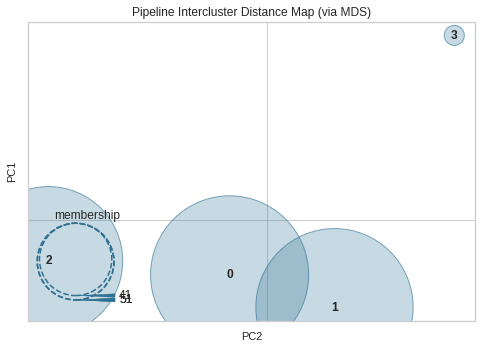

In [97]:
# passando o argumento "plot=distance", podemos visualizar a distância entre os clusters
plot_model(kmeans, plot='distance')

In [98]:
# visualizando a distribuição dos clusters em 3D
plot_model(kmeans, plot='tsne')

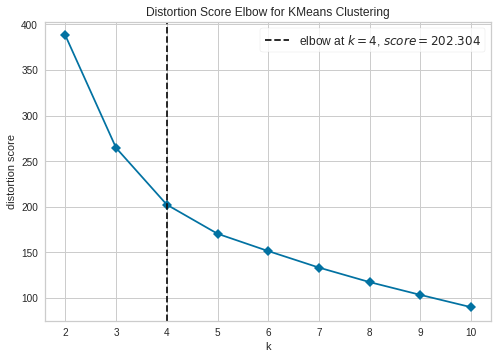

In [99]:
# visualizando a "curva do cotovelo" do modelo
plot_model(kmeans, plot='elbow')

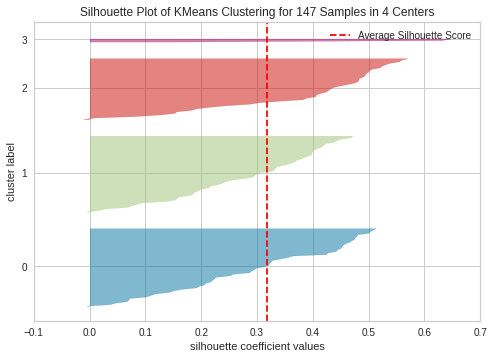

In [100]:
# visualizando a silhueta da consistência da distribuição dos clusters
plot_model(kmeans, plot='silhouette')

In [101]:
# visualizando a quantidade das observações nos clusters
plot_model(kmeans, plot='distribution')

In [102]:
# visualizando a distribuição dos clusters pelo recurso "compactness"
plot_model(kmeans, plot='distribution', feature='compactness')

In [103]:
# visualizando a distribuição dos clusters pelo recurso "asymmetry"
plot_model(kmeans, plot='distribution', feature='asymmetry')

In [104]:
# realizando novas predições com os dados de valição
unseen_predictions = predict_model(kmeans, data=val_data)

# visualizando as 5 primeiras predições
unseen_predictions.head()

,area,perimeter,compactness,length,width,asymmetry,length.1,Cluster
0,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Cluster 0
1,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Cluster 0
2,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,Cluster 0
3,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Cluster 0
4,15.69,14.75,0.9058,5.527,3.514,1.599,5.046,Cluster 0


In [105]:
# salvando o modelo
save_model(kmeans,'Final KMeans Model 06Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=Non...
                  Fix_multicollinearity(correlation_with_target_preference=None,
                                        correlation_with_target_threshold=0.0,
                                        target_variable='UNSUPERVISED_DUMMY_TARGET',
                                        threshold=0.7)),
     

In [106]:
# instanciando o modelo
saved_kmeans = load_model('Final KMeans Model 06Nov2021')

Transformation Pipeline and Model Successfully Loaded


In [107]:
# realizando novas predições
new_prediction = predict_model(saved_kmeans, data=val_data)

In [108]:
# visualizando as 5 primeiras predições
new_prediction.head()

,area,perimeter,compactness,length,width,asymmetry,length.1,Cluster
0,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Cluster 0
1,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Cluster 0
2,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,Cluster 0
3,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Cluster 0
4,15.69,14.75,0.9058,5.527,3.514,1.599,5.046,Cluster 0


Chegamos ao final da utilidade do `PyCaret`. Existe outras possibilidades de aplicação, mas como forma de introdução foi possível construir uma base de conhecimento.

## **7. Material de apoio**

- https://pycaret.readthedocs.io/en/latest/tutorials.html#